In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import numpy.random as rnd
import timeit


features_path=r'q1\data\features.txt'
target_path=r'q1\data\target.txt'


In [2]:
X_og=np.genfromtxt(features_path,delimiter=",")
y_og=np.genfromtxt(target_path,dtype=(int),delimiter=",")
d=X_og.shape[1]
n=X_og.shape[0]
C=100

### Batch Gradient Descent

In [3]:
'''
Function: Cost function for SVM
'''

def f(W,b):
    f1=0.5*np.dot(W,W)
    f2=0
    for i in range(len(X)):
        f2+=max(0,1-y[i]*(W.dot(X[i])+b))
    f2=C*f2
    return f1+f2

def get_cost_pc(f_k_minus_1, f_k):
    cost_pc=abs(f_k_minus_1-f_k)/f_k_minus_1
    return cost_pc*100

def delta_f_w(W, b, j):
    d1=W[j]
    d2=0
    for i in range(len(X)):
        if y[i]*(W.dot(X[i])+b)>=1:
            d2+=0
        else:
            d2+=(-y[i]*X[i][j])
    return d1+C*d2

def delta_f_b(W,b):
    d=0
    for i in range(len(X)):
        if y[i]*(W.dot(X[i])+b)>=1:
            d+=0
        else:
            d+=(-y[i])
    return C*d

In [4]:
'''Initializations'''
X=copy.deepcopy(X_og)
y=copy.deepcopy(y_og)
eta=3e-7
error=0.25
W=np.zeros(d)
b=0
f_0=f(W,b)

In [5]:
k=0
W_pr=np.zeros(d)
b_pr=0
cost_gd=[]
cost_pc=100
f_0=f(W,b)
cost_gd.append(f_0)
start=timeit.default_timer()
while cost_pc>=error:
    for j in range(d):
        W_pr[j]=W[j]-eta*delta_f_w(W, b, j)
        
    b_pr=b-eta*delta_f_b(W,b)
    k+=1
    cost_gd.append(f(W_pr,b_pr))
    W=copy.deepcopy(W_pr)
    b=copy.deepcopy(b_pr)
    cost_pc=get_cost_pc(cost_gd[k-1],cost_gd[k])
    #print(cost_gd[k-1])
end=timeit.default_timer()
batch_time=(end-start)

### Stocastic Gradient Descent


In [19]:
def f(W,b):
    f1=0.5*np.dot(W,W)
    f2=0
    for i in range(len(X)):
        f2+=max(0,1-y[i]*(W.dot(X[i])+b))
    f2=C*f2
    return f1+f2

def get_cost_pc(f_k_minus_1, f_k):
    cost_pc=abs(f_k_minus_1-f_k)/f_k_minus_1
    return cost_pc*100

def delta_f_w(W, b, j, X_i, y_i):
    d1=W[j]
    d2=0
    if y_i*(W.dot(X_i)+b)>=1:
        d2+=0
    else:
        d2+=(-y_i*X_i[j])
    return d1+C*d2

def delta_f_b(W,b, X_i, y_i):
    d=0
    if y_i*(W.dot(X_i)+b)>=1:
        d+=0
    else:
        d+=(-y_i)
    return C*d

In [20]:
X=copy.deepcopy(X_og)
y=copy.deepcopy(y_og)
Xy=np.hstack((X,y.reshape(len(X),1)))
rnd.RandomState(seed=66)
rnd.shuffle(Xy)
y=Xy[:,-1]
X=Xy[:,:-1]

In [21]:
'''Initializations'''
eta=0.0001
error=0.001
W=np.zeros(d)
b=0
cost_0=0


In [22]:
k=0
W_pr=np.zeros(d)
b_pr=0
cost_sgd=[]
deltas=[]
cost_pc=100
f_0=f(W,b)
cost_sgd.append(f_0)
deltas.append(0)
i=0
delta=100
start=timeit.default_timer()
while delta>=error:
    for j in range(d):
        W_pr[j]=W[j]-eta*delta_f_w(W, b, j,X[i],y[i])   
    b_pr=b-eta*delta_f_b(W,b,X[i],y[i])
    k+=1
    i=(i%n)+1
    cost_sgd.append(f(W_pr,b_pr))
    W=copy.deepcopy(W_pr)
    b=copy.deepcopy(b_pr)
    cost_pc=get_cost_pc(cost_sgd[k-1],cost_sgd[k])
    delta=0.5*deltas[k-1]+0.5*cost_pc
    deltas.append(delta)
    #if (k%100==0):
    #    print(cost_sgd[k-1],delta) 
end=timeit.default_timer()
sgd_time=(end-start)

### Mini Batch Gradient

In [23]:
def f(W,b):
    f1=0.5*np.dot(W,W)
    f2=0
    for i in range(len(X)):
        f2+=max(0,1-y[i]*(W.dot(X[i])+b))
    f2=C*f2
    return f1+f2

def get_cost_pc(f_k_minus_1, f_k):
    cost_pc=abs(f_k_minus_1-f_k)/f_k_minus_1
    return cost_pc*100

def delta_f_w(W, b, j, X, y):
    d1=W[j]
    d2=0
    for i in range(len(X)):
        if y[i]*(W.dot(X[i])+b)>=1:
            d2+=0
        else:
            d2+=(-y[i]*X[i][j])
    return d1+C*d2


def delta_f_b(W,b, X, y):
    d=0
    for i in range(len(X)):
        if y[i]*(W.dot(X[i])+b)>=1:
            d+=0
        else:
            d+=(-y[i])
    return C*d

In [24]:
X=copy.deepcopy(X_og)
y=copy.deepcopy(y_og)
Xy=np.hstack((X,y.reshape(len(X),1)))
rnd.RandomState(seed=66)
rnd.shuffle(Xy)
y=Xy[:,-1]
X=Xy[:,:-1]

In [25]:
'''Initializations'''
eta=1e-5
error=0.01
B=20
W=np.zeros(d)
b=0
cost_0=0
f_0=f(W,b)


In [26]:
k=0
W_pr=np.zeros(d)
b_pr=0
cost_mbgd=[]
deltas=[]
cost_pc=100
f_0=f(W,b)
cost_mbgd.append(f_0)
deltas.append(0)
l=0
delta=100
start=timeit.default_timer()
while delta>=error:
    b1=int(l*B)
    b2=int((l+1)*B)
    for j in range(d):
        W_pr[j]=W[j]-eta*delta_f_w(W, b, j,X[b1:b2],y[b1:b2])    
    b_pr=b-eta*delta_f_b(W,b,X[b1:b2],y[b1:b2])
    k+=1
    l=(l+1) % (n/B)
    cost_mbgd.append(f(W_pr,b_pr))
    W=copy.deepcopy(W_pr)
    b=copy.deepcopy(b_pr)
    cost_pc=get_cost_pc(cost_mbgd[k-1],cost_mbgd[k])
    delta=0.5*deltas[k-1]+0.5*cost_pc
    deltas.append(delta)
    #if (k%40==0):
    #    print(cost_mbgd[k-1],delta)
end=timeit.default_timer()    
mbgd_time=(end-start)

### Plots


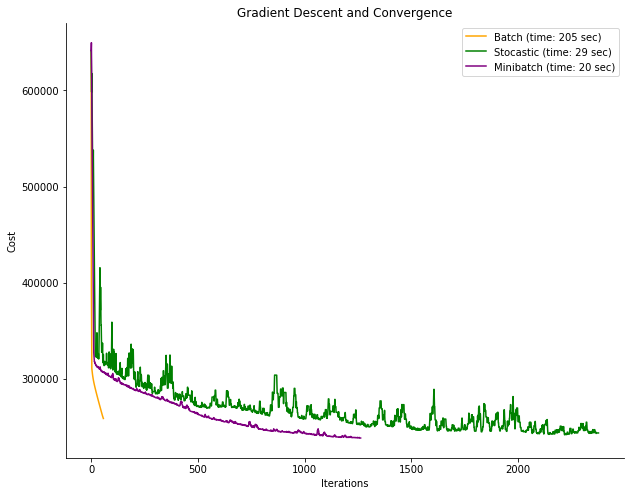

In [27]:
fig, ax=plt.subplots(1,1,figsize=(10,8))
ax.set_ylabel("Cost")
ax.set_xlabel("Iterations")
ax.plot(cost_gd, c='orange', label='Batch (time: '+str(round(batch_time))+' sec)')
ax.plot(cost_sgd, c='green', label='Stocastic (time: '+str(round(sgd_time))+' sec)')
ax.plot(cost_mbgd, c='purple', label='Minibatch (time: '+str(round(mbgd_time))+' sec)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
leg = ax.legend();
ax.set_title('Gradient Descent and Convergence')
plt.show()

In [28]:
print('Iterations for Gradient Descent')
print('Batch: '+str(len(cost_gd)))
print('Stocastic: '+str(len(cost_sgd)))
print('MiniBatch: '+str(len(cost_mbgd)))

Iterations for Gradient Descent
Batch: 58
Stocastic: 2377
MiniBatch: 1263
